C:\Users\Marianne\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


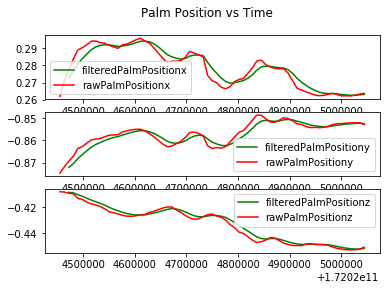

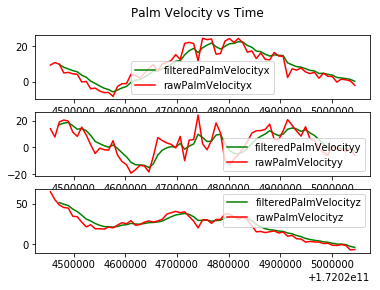

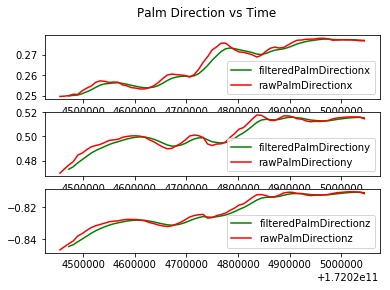

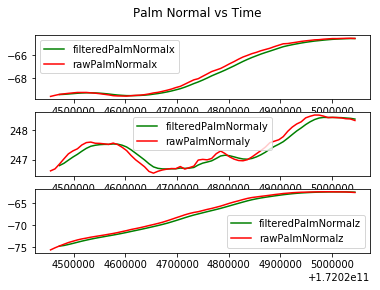

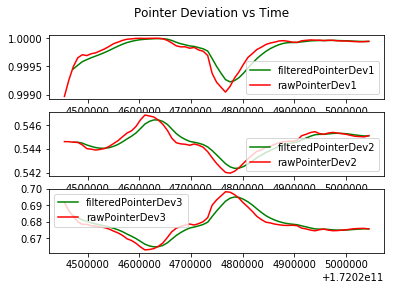

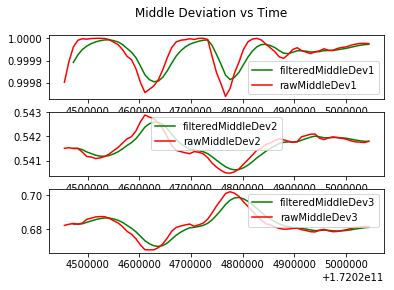

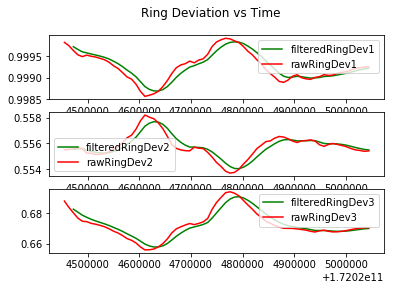

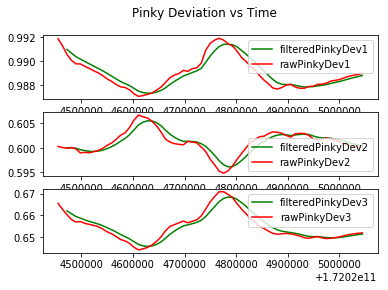

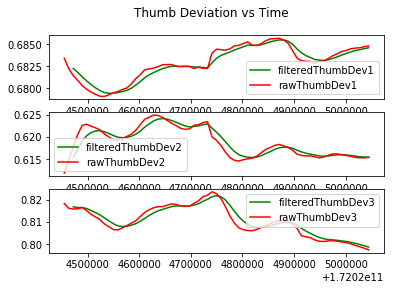

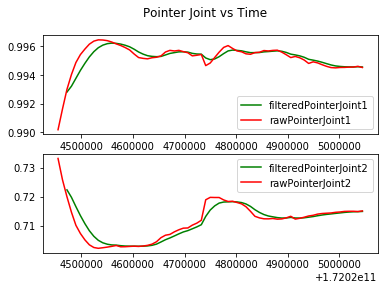

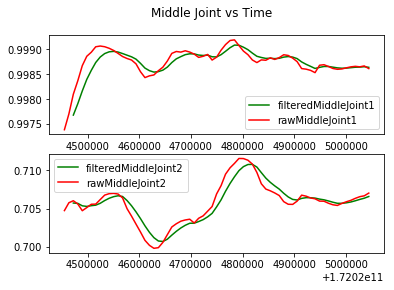

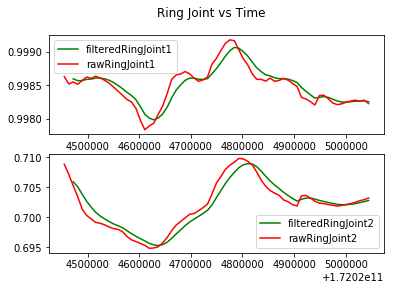

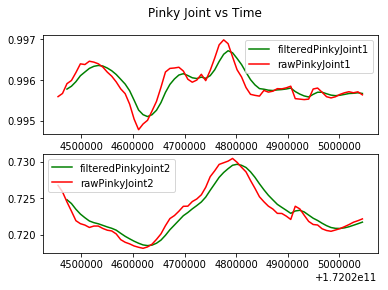

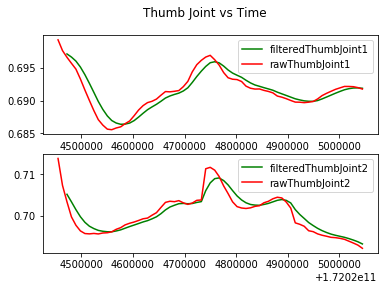

In [2]:
#!/usr/bin/python3

import Physics_Filter
import numpy
import matplotlib.pyplot as plt
import pandas
import csv

# TODO:
# - [ ] Find a better way to structure all of this
# - [X] Figure out how to use relative file paths

handParts = ["palmXVKF", "palmDirKF", "palmNormKF", "pointerDevKF", "middleDevKF", "ringDevKF", "pinkyDevKF", "thumbDevKF", "pointerJointKF", "middleJointKF", "ringJointKF", "pinkyJointKF", "thumbJointKF"]

def main():
    initializeHand()
    setupKF(r'.\Leap_asl_Andrew_Windows\Data_Folder\a0.csv',r'.\Leap_asl_Andrew_Windows\Data_Folder\a1.csv')
    filteredData = [ ]
    with open(r'.\Leap_asl_Andrew_Windows\Data_Folder\a3.csv') as file:
        data = csv.reader(file)
        next(data, None)
        
        sample1 = next(data, None)
        sample1 = numpy.array(sample1)
        sample1 = [float(i) for i in sample1]
        
        sample2 = next(data, None)
        sample2 = numpy.array(sample2)
        sample2 = [float(i) for i in sample2]
        
        # establish a priorState
        getInitialState(sample1, sample2)
        
        for line in data:
            line = numpy.array(line)
            line = [float(i) for i in line]
            line = KalmanFilter(line)
            filteredData.append(line)
            
    filteredData = numpy.array(filteredData)
    
    rawData = numpy.array(dataSorter(r'.\Leap_asl_Andrew_Windows\Data_Folder\a3.csv'))
    
    rawPalmPosition  = rawData[0]
    rawPalmPositionx = dataProcessor(0,rawPalmPosition)
    rawPalmPositiony = dataProcessor(1,rawPalmPosition)
    rawPalmPositionz = dataProcessor(2,rawPalmPosition)
    
    rawPalmVelocity  = rawData[1]
    rawPalmVelocityx = dataProcessor(0,rawPalmVelocity)
    rawPalmVelocityy = dataProcessor(1,rawPalmVelocity)
    rawPalmVelocityz = dataProcessor(2,rawPalmVelocity)
    
    rawPalmDirection  = rawData[2]
    rawPalmDirectionx = dataProcessor(0,rawPalmDirection)
    rawPalmDirectiony = dataProcessor(1,rawPalmDirection)
    rawPalmDirectionz = dataProcessor(2,rawPalmDirection)
    
    rawPalmNormal  = rawData[3]
    rawPalmNormalx = dataProcessor(0,rawPalmNormal)
    rawPalmNormaly = dataProcessor(1,rawPalmNormal)
    rawPalmNormalz = dataProcessor(2,rawPalmNormal)
    
    rawPointerDev  = rawData[4]
    rawPointerDev1 = dataProcessor(0,rawPointerDev)
    rawPointerDev2 = dataProcessor(1,rawPointerDev)
    rawPointerDev3 = dataProcessor(2,rawPointerDev)
    
    rawMiddleDev  = rawData[5]
    rawMiddleDev1 = dataProcessor(0,rawMiddleDev)
    rawMiddleDev2 = dataProcessor(1,rawMiddleDev)
    rawMiddleDev3 = dataProcessor(2,rawMiddleDev)
    
    rawRingDev  = rawData[6]
    rawRingDev1 = dataProcessor(0,rawRingDev)
    rawRingDev2 = dataProcessor(1,rawRingDev)
    rawRingDev3 = dataProcessor(2,rawRingDev)
    
    rawPinkyDev  = rawData[7]
    rawPinkyDev1 = dataProcessor(0,rawPinkyDev)
    rawPinkyDev2 = dataProcessor(1,rawPinkyDev)
    rawPinkyDev3 = dataProcessor(2,rawPinkyDev)
    
    rawThumbDev  = rawData[8]
    rawThumbDev1 = dataProcessor(0,rawThumbDev)
    rawThumbDev2 = dataProcessor(1,rawThumbDev)
    rawThumbDev3 = dataProcessor(2,rawThumbDev)
    
    rawPointerJoint  = rawData[9]
    rawPointerJoint1 = dataProcessor(0,rawPointerJoint)
    rawPointerJoint2 = dataProcessor(1,rawPointerJoint)
    
    rawMiddleJoint  = rawData[10]
    rawMiddleJoint1 = dataProcessor(0,rawMiddleJoint)
    rawMiddleJoint2 = dataProcessor(1,rawMiddleJoint)
    
    rawRingJoint  = rawData[11]
    rawRingJoint1 = dataProcessor(0,rawRingJoint)
    rawRingJoint2 = dataProcessor(1,rawRingJoint)
    
    rawPinkyJoint  = rawData[12]
    rawPinkyJoint1 = dataProcessor(0,rawPinkyJoint)
    rawPinkyJoint2 = dataProcessor(1,rawPinkyJoint)
    
    rawThumbJoint  = rawData[13]
    rawThumbJoint1 = dataProcessor(0,rawThumbJoint)
    rawThumbJoint2 = dataProcessor(1,rawThumbJoint)
    
    rawTimeStamp = rawData[14]
    
    filteredPalmPosition  = filteredData[:,0]
    filteredPalmPositionx = dataProcessor(0,filteredPalmPosition)
    filteredPalmPositiony = dataProcessor(1,filteredPalmPosition)
    filteredPalmPositionz = dataProcessor(2,filteredPalmPosition)
    
    filteredPalmVelocity  = filteredData[:,1]
    filteredPalmVelocityx = dataProcessor(0,filteredPalmVelocity)
    filteredPalmVelocityy = dataProcessor(1,filteredPalmVelocity)
    filteredPalmVelocityz = dataProcessor(2,filteredPalmVelocity)
    
    filteredPalmDirection  = filteredData[:,2]
    filteredPalmDirectionx = dataProcessor(0,filteredPalmDirection)
    filteredPalmDirectiony = dataProcessor(1,filteredPalmDirection)
    filteredPalmDirectionz = dataProcessor(2,filteredPalmDirection)
    
    filteredPalmNormal  = filteredData[:,3]
    filteredPalmNormalx = dataProcessor(0,filteredPalmNormal)
    filteredPalmNormaly = dataProcessor(1,filteredPalmNormal)
    filteredPalmNormalz = dataProcessor(2,filteredPalmNormal)
    
    filteredPointerDev  = filteredData[:,4]
    filteredPointerDev1 = dataProcessor(0,filteredPointerDev)
    filteredPointerDev2 = dataProcessor(1,filteredPointerDev)
    filteredPointerDev3 = dataProcessor(2,filteredPointerDev)
    
    filteredMiddleDev  = filteredData[:,5]
    filteredMiddleDev1 = dataProcessor(0,filteredMiddleDev)
    filteredMiddleDev2 = dataProcessor(1,filteredMiddleDev)
    filteredMiddleDev3 = dataProcessor(2,filteredMiddleDev)
    
    filteredRingDev  = filteredData[:,6]
    filteredRingDev1 = dataProcessor(0,filteredRingDev)
    filteredRingDev2 = dataProcessor(1,filteredRingDev)
    filteredRingDev3 = dataProcessor(2,filteredRingDev)
    
    filteredPinkyDev  = filteredData[:,7]
    filteredPinkyDev1 = dataProcessor(0,filteredPinkyDev)
    filteredPinkyDev2 = dataProcessor(1,filteredPinkyDev)
    filteredPinkyDev3 = dataProcessor(2,filteredPinkyDev)
    
    filteredThumbDev  = filteredData[:,8]
    filteredThumbDev1 = dataProcessor(0,filteredThumbDev)
    filteredThumbDev2 = dataProcessor(1,filteredThumbDev)
    filteredThumbDev3 = dataProcessor(2,filteredThumbDev)
    
    filteredPointerJoint  = filteredData[:,9]
    filteredPointerJoint1 = dataProcessor(0,filteredPointerJoint)
    filteredPointerJoint2 = dataProcessor(1,filteredPointerJoint)
    
    filteredMiddleJoint  = filteredData[:,10]
    filteredMiddleJoint1 = dataProcessor(0,filteredMiddleJoint)
    filteredMiddleJoint2 = dataProcessor(1,filteredMiddleJoint)
    
    filteredRingJoint  = filteredData[:,11]
    filteredRingJoint1 = dataProcessor(0,filteredRingJoint)
    filteredRingJoint2 = dataProcessor(1,filteredRingJoint)
    
    filteredPinkyJoint  = filteredData[:,12]
    filteredPinkyJoint1 = dataProcessor(0,filteredPinkyJoint)
    filteredPinkyJoint2 = dataProcessor(1,filteredPinkyJoint)
    
    filteredThumbJoint  = filteredData[:,13]
    filteredThumbJoint1 = dataProcessor(0,filteredThumbJoint)
    filteredThumbJoint2 = dataProcessor(1,filteredThumbJoint)
    
    timeStamp = filteredData[:,14]
    
    plt.figure(1)
    plt.figure(1).suptitle("Palm Position vs Time")
    plt.subplot(311)
    plt.plot(timeStamp, filteredPalmPositionx, 'g', label="filteredPalmPositionx")
    plt.plot(rawTimeStamp, rawPalmPositionx, 'r', label="rawPalmPositionx")
    plt.legend(loc='best')
    plt.subplot(312)
    plt.plot(timeStamp, filteredPalmPositiony, 'g', label="filteredPalmPositiony")
    plt.plot(rawTimeStamp, rawPalmPositiony, 'r', label="rawPalmPositiony")
    plt.legend(loc='best')
    plt.subplot(313)
    plt.plot(timeStamp, filteredPalmPositionz, 'g', label="filteredPalmPositionz")
    plt.plot(rawTimeStamp, rawPalmPositionz, 'r', label="rawPalmPositionz")
    plt.legend(loc='best')
    plt.figure(1).show()
    
    plt.figure(2)
    plt.figure(2).suptitle("Palm Velocity vs Time")
    plt.subplot(311)
    plt.plot(timeStamp, filteredPalmVelocityx, 'g', label="filteredPalmVelocityx")
    plt.plot(rawTimeStamp, rawPalmVelocityx, 'r', label="rawPalmVelocityx")
    plt.legend(loc='best')
    plt.subplot(312)
    plt.plot(timeStamp, filteredPalmVelocityy, 'g', label="filteredPalmVelocityy")
    plt.plot(rawTimeStamp, rawPalmVelocityy, 'r', label="rawPalmVelocityy")
    plt.legend(loc='best')
    plt.subplot(313)
    plt.plot(timeStamp, filteredPalmVelocityz, 'g', label="filteredPalmVelocityz")
    plt.plot(rawTimeStamp, rawPalmVelocityz, 'r', label="rawPalmVelocityz")
    plt.legend(loc='best')
    plt.figure(2).show()
    
    plt.figure(3)
    plt.figure(3).suptitle("Palm Direction vs Time")
    plt.subplot(311)
    plt.plot(timeStamp, filteredPalmDirectionx, 'g', label="filteredPalmDirectionx")
    plt.plot(rawTimeStamp, rawPalmDirectionx, 'r', label="rawPalmDirectionx")
    plt.legend(loc='best')
    plt.subplot(312)
    plt.plot(timeStamp, filteredPalmDirectiony, 'g', label="filteredPalmDirectiony")
    plt.plot(rawTimeStamp, rawPalmDirectiony, 'r', label="rawPalmDirectiony")
    plt.legend(loc='best')
    plt.subplot(313)
    plt.plot(timeStamp, filteredPalmDirectionz, 'g', label="filteredPalmDirectionz")
    plt.plot(rawTimeStamp, rawPalmDirectionz, 'r', label="rawPalmDirectionz")
    plt.legend(loc='best')
    plt.figure(3).show()
    
    plt.figure(4)
    plt.figure(4).suptitle("Palm Normal vs Time")
    plt.subplot(311)
    plt.plot(timeStamp, filteredPalmNormalx, 'g', label="filteredPalmNormalx")
    plt.plot(rawTimeStamp, rawPalmNormalx, 'r', label="rawPalmNormalx")
    plt.legend(loc='best')
    plt.subplot(312)
    plt.plot(timeStamp, filteredPalmNormaly, 'g', label="filteredPalmNormaly")
    plt.plot(rawTimeStamp, rawPalmNormaly, 'r', label="rawPalmNormaly")
    plt.legend(loc='best')
    plt.subplot(313)
    plt.plot(timeStamp, filteredPalmNormalz, 'g', label="filteredPalmNormalz")
    plt.plot(rawTimeStamp, rawPalmNormalz, 'r', label="rawPalmNormalz")
    plt.legend(loc='best')
    plt.figure(4).show()
    
    plt.figure(5)
    plt.figure(5).suptitle("Pointer Deviation vs Time")
    plt.subplot(311)
    plt.plot(timeStamp, filteredPointerDev1, 'g', label="filteredPointerDev1")
    plt.plot(rawTimeStamp, rawPointerDev1, 'r', label="rawPointerDev1")
    plt.legend(loc='best')
    plt.subplot(312)
    plt.plot(timeStamp, filteredPointerDev2, 'g', label="filteredPointerDev2")
    plt.plot(rawTimeStamp, rawPointerDev2, 'r', label="rawPointerDev2")
    plt.legend(loc='best')
    plt.subplot(313)
    plt.plot(timeStamp, filteredPointerDev3, 'g', label="filteredPointerDev3")
    plt.plot(rawTimeStamp, rawPointerDev3, 'r', label="rawPointerDev3")
    plt.legend(loc='best')
    plt.figure(5).show()
    
    plt.figure(6)
    plt.figure(6).suptitle("Middle Deviation vs Time")
    plt.subplot(311)
    plt.plot(timeStamp, filteredMiddleDev1, 'g', label="filteredMiddleDev1")
    plt.plot(rawTimeStamp, rawMiddleDev1, 'r', label="rawMiddleDev1")
    plt.legend(loc='best')
    plt.subplot(312)
    plt.plot(timeStamp, filteredMiddleDev2, 'g', label="filteredMiddleDev2")
    plt.plot(rawTimeStamp, rawMiddleDev2, 'r', label="rawMiddleDev2")
    plt.legend(loc='best')
    plt.subplot(313)
    plt.plot(timeStamp, filteredMiddleDev3, 'g', label="filteredMiddleDev3")
    plt.plot(rawTimeStamp, rawMiddleDev3, 'r', label="rawMiddleDev3")
    plt.legend(loc='best')
    plt.figure(6).show()
    
    plt.figure(7)
    plt.figure(7).suptitle("Ring Deviation vs Time")
    plt.subplot(311)
    plt.plot(timeStamp, filteredRingDev1, 'g', label="filteredRingDev1")
    plt.plot(rawTimeStamp, rawRingDev1, 'r', label="rawRingDev1")
    plt.legend(loc='best')
    plt.subplot(312)
    plt.plot(timeStamp, filteredRingDev2, 'g', label="filteredRingDev2")
    plt.plot(rawTimeStamp, rawRingDev2, 'r', label="rawRingDev2")
    plt.legend(loc='best')
    plt.subplot(313)
    plt.plot(timeStamp, filteredRingDev3, 'g', label="filteredRingDev3")
    plt.plot(rawTimeStamp, rawRingDev3, 'r', label="rawRingDev3")
    plt.legend(loc='best')
    plt.figure(7).show()
    
    plt.figure(8)
    plt.figure(8).suptitle("Pinky Deviation vs Time")
    plt.subplot(311)
    plt.plot(timeStamp, filteredPinkyDev1, 'g', label="filteredPinkyDev1")
    plt.plot(rawTimeStamp, rawPinkyDev1, 'r', label="rawPinkyDev1")
    plt.legend(loc='best')
    plt.subplot(312)
    plt.plot(timeStamp, filteredPinkyDev2, 'g', label="filteredPinkyDev2")
    plt.plot(rawTimeStamp, rawPinkyDev2, 'r', label="rawPinkyDev2")
    plt.legend(loc='best')
    plt.subplot(313)
    plt.plot(timeStamp, filteredPinkyDev3, 'g', label="filteredPinkyDev3")
    plt.plot(rawTimeStamp, rawPinkyDev3, 'r', label="rawPinkyDev3")
    plt.legend(loc='best')
    plt.figure(8).show()
    
    plt.figure(9)
    plt.figure(9).suptitle("Thumb Deviation vs Time")
    plt.subplot(311)
    plt.plot(timeStamp, filteredThumbDev1, 'g', label="filteredThumbDev1")
    plt.plot(rawTimeStamp, rawThumbDev1, 'r', label="rawThumbDev1")
    plt.legend(loc='best')
    plt.subplot(312)
    plt.plot(timeStamp, filteredThumbDev2, 'g', label="filteredThumbDev2")
    plt.plot(rawTimeStamp, rawThumbDev2, 'r', label="rawThumbDev2")
    plt.legend(loc='best')
    plt.subplot(313)
    plt.plot(timeStamp, filteredThumbDev3, 'g', label="filteredThumbDev3")
    plt.plot(rawTimeStamp, rawThumbDev3, 'r', label="rawThumbDev3")
    plt.legend(loc='best')
    plt.figure(9).show()
    
    plt.figure(10)
    plt.figure(10).suptitle("Pointer Joint vs Time")
    plt.subplot(211)
    plt.plot(timeStamp, filteredPointerJoint1, 'g', label="filteredPointerJoint1")
    plt.plot(rawTimeStamp, rawPointerJoint1, 'r', label="rawPointerJoint1")
    plt.legend(loc='best')
    plt.subplot(212)
    plt.plot(timeStamp, filteredPointerJoint2, 'g', label="filteredPointerJoint2")
    plt.plot(rawTimeStamp, rawPointerJoint2, 'r', label="rawPointerJoint2")
    plt.legend(loc='best')
    plt.figure(10).show()
    
    plt.figure(11)
    plt.figure(11).suptitle("Middle Joint vs Time")
    plt.subplot(211)
    plt.plot(timeStamp, filteredMiddleJoint1, 'g', label="filteredMiddleJoint1")
    plt.plot(rawTimeStamp, rawMiddleJoint1, 'r', label="rawMiddleJoint1")
    plt.legend(loc='best')
    plt.subplot(212)
    plt.plot(timeStamp, filteredMiddleJoint2, 'g', label="filteredMiddleJoint2")
    plt.plot(rawTimeStamp, rawMiddleJoint2, 'r', label="rawMiddleJoint2")
    plt.legend(loc='best')
    plt.figure(11).show()
    
    plt.figure(12)
    plt.figure(12).suptitle("Ring Joint vs Time")
    plt.subplot(211)
    plt.plot(timeStamp, filteredRingJoint1, 'g', label="filteredRingJoint1")
    plt.plot(rawTimeStamp, rawRingJoint1, 'r', label="rawRingJoint1")
    plt.legend(loc='best')
    plt.subplot(212)
    plt.plot(timeStamp, filteredRingJoint2, 'g', label="filteredRingJoint2")
    plt.plot(rawTimeStamp, rawRingJoint2, 'r', label="rawRingJoint2")
    plt.legend(loc='best')
    plt.figure(12).show()
    
    plt.figure(13)
    plt.figure(13).suptitle("Pinky Joint vs Time")
    plt.subplot(211)
    plt.plot(timeStamp, filteredPinkyJoint1, 'g', label="filteredPinkyJoint1")
    plt.plot(rawTimeStamp, rawPinkyJoint1, 'r', label="rawPinkyJoint1")
    plt.legend(loc='best')
    plt.subplot(212)
    plt.plot(timeStamp, filteredPinkyJoint2, 'g', label="filteredPinkyJoint2")
    plt.plot(rawTimeStamp, rawPinkyJoint2, 'r', label="rawPinkyJoint2")
    plt.legend(loc='best')
    plt.figure(13).show()
    
    plt.figure(14)
    plt.figure(14).suptitle("Thumb Joint vs Time")
    plt.subplot(211)
    plt.plot(timeStamp, filteredThumbJoint1, 'g', label="filteredThumbJoint1")
    plt.plot(rawTimeStamp, rawThumbJoint1, 'r', label="rawThumbJoint1")
    plt.legend(loc='best')
    plt.subplot(212)
    plt.plot(timeStamp, filteredThumbJoint2, 'g', label="filteredThumbJoint2")
    plt.plot(rawTimeStamp, rawThumbJoint2, 'r', label="rawThumbJoint2")
    plt.legend(loc='best')
    plt.figure(14).show()

def initializeHand():
    
    part = 0
    while part < 13:
        handParts[part] = Physics_Filter.Physics_Filter(handParts[part])
        part = part + 1
        
    # Initializes all the parts of the hand for the filter
    
def setupKF(staticAbsoluteFilePath, movingAbsoluteFilePath):
        
    staticCanonicalData = dataSorter(staticAbsoluteFilePath)
    movingCanonicalData = dataSorter(movingAbsoluteFilePath)
                
    # process canonicalData
    staticPalmPositionData  = staticCanonicalData[0]
    staticPalmVelocityData  = staticCanonicalData[1]
    staticPalmDirectionData = staticCanonicalData[2]
    staticPalmNormData      = staticCanonicalData[3]
    staticPointerDevData    = staticCanonicalData[4]
    staticMiddleDevData     = staticCanonicalData[5]
    staticRingDevData       = staticCanonicalData[6]
    staticPinkyDevData      = staticCanonicalData[7]
    staticThumbDevData      = staticCanonicalData[8]
    staticPointerJointData  = staticCanonicalData[9]
    staticMiddleJointData   = staticCanonicalData[10]
    staticRingJointData     = staticCanonicalData[11]
    staticPinkyJointData    = staticCanonicalData[12]
    staticThumbJointData    = staticCanonicalData[13]
    staticTimestampData     = staticCanonicalData[14]
        
    movingPalmPositionData  = movingCanonicalData[0]
    movingPalmVelocityData  = movingCanonicalData[1]
    movingPalmDirectionData = movingCanonicalData[2]
    movingPalmNormData      = movingCanonicalData[3]
    movingPointerDevData    = movingCanonicalData[4]
    movingMiddleDevData     = movingCanonicalData[5]
    movingRingDevData       = movingCanonicalData[6]
    movingPinkyDevData      = movingCanonicalData[7]
    movingThumbDevData      = movingCanonicalData[8]
    movingPointerJointData  = movingCanonicalData[9]
    movingMiddleJointData   = movingCanonicalData[10]
    movingRingJointData     = movingCanonicalData[11]
    movingPinkyJointData    = movingCanonicalData[12]
    movingThumbJointData    = movingCanonicalData[13]
    movingTimestampData     = movingCanonicalData[14]

    # setupKalmanFilter for each handPart
    handParts[0].setupKalmanFilterxv(staticPalmPositionData, staticPalmVelocityData,  movingPalmPositionData, movingPalmVelocityData)
    handParts[1].setupKalmanFilterx(staticPalmDirectionData, movingPalmDirectionData, staticTimestampData,       movingTimestampData) 
    handParts[2].setupKalmanFilterx(staticPalmNormData,      movingPalmNormData,      staticTimestampData,       movingTimestampData) 
    handParts[3].setupKalmanFilterx(staticPointerDevData,    movingPointerDevData,    staticTimestampData,       movingTimestampData)
    handParts[4].setupKalmanFilterx(staticMiddleDevData,     movingMiddleDevData,     staticTimestampData,       movingTimestampData)
    handParts[5].setupKalmanFilterx(staticRingDevData,       movingRingDevData,       staticTimestampData,       movingTimestampData)
    handParts[6].setupKalmanFilterx(staticPinkyDevData,      movingPinkyDevData,      staticTimestampData,       movingTimestampData)
    handParts[7].setupKalmanFilterx(staticThumbDevData,      movingThumbDevData,      staticTimestampData,       movingTimestampData)
    handParts[8].setupKalmanFilterx(staticPointerJointData,  movingPointerJointData,  staticTimestampData,       movingTimestampData)
    handParts[9].setupKalmanFilterx(staticMiddleJointData,   movingMiddleJointData,   staticTimestampData,       movingTimestampData)
    handParts[10].setupKalmanFilterx(staticRingJointData,    movingRingJointData,     staticTimestampData,       movingTimestampData)
    handParts[11].setupKalmanFilterx(staticPinkyJointData,   movingPinkyJointData,    staticTimestampData,       movingTimestampData)
    handParts[12].setupKalmanFilterx(staticThumbJointData,   movingThumbJointData,    staticTimestampData,       movingTimestampData)
    
def Organizer(*args):
    
    xyz       = list(zip(*args))
    xyz       = [list(tup) for tup in xyz] 
    
    return xyz
    
def getInitialState(canonicalData, nextData):
    # fill in the respective indices
    palmPosition  = [canonicalData[6],  canonicalData[7],  canonicalData[8]]
    palmVelocity  = [canonicalData[9],  canonicalData[10], canonicalData[11]]
    palmDirection = [canonicalData[3],  canonicalData[4],  canonicalData[5]]
    palmNormal    = [canonicalData[0],  canonicalData[1],  canonicalData[2]]
    pointerDev    = [canonicalData[17], canonicalData[18], canonicalData[19]]
    middleDev     = [canonicalData[22], canonicalData[23], canonicalData[24]]
    ringDev       = [canonicalData[27], canonicalData[28], canonicalData[29]]
    pinkyDev      = [canonicalData[32], canonicalData[33], canonicalData[34]]
    thumbDev      = [canonicalData[12], canonicalData[13], canonicalData[14]]
    pointerJoint  = [canonicalData[20], canonicalData[21]]
    middleJoint   = [canonicalData[25], canonicalData[26]]
    ringJoint     = [canonicalData[30], canonicalData[31]]
    pinkyJoint    = [canonicalData[35], canonicalData[36]]
    thumbJoint    = [canonicalData[15], canonicalData[16]]
    timeStamp     =  canonicalData[37]
    
    part = 0
    while part < 13:
        handParts[part].timestamp = timeStamp
        part = part + 1
    
    palmPosition1  = [nextData[6],  nextData[7],  nextData[8]]
    palmVelocity1  = [nextData[9],  nextData[10], nextData[11]]
    palmDirection1 = [nextData[3],  nextData[4],  nextData[5]]
    palmNormal1    = [nextData[0],  nextData[1],  nextData[2]]
    pointerDev1    = [nextData[17], nextData[18], nextData[19]]
    middleDev1     = [nextData[22], nextData[23], nextData[24]]
    ringDev1       = [nextData[27], nextData[28], nextData[29]]
    pinkyDev1      = [nextData[32], nextData[33], nextData[34]]
    thumbDev1      = [nextData[12], nextData[13], nextData[14]]
    pointerJoint1  = [nextData[20], nextData[21]]
    middleJoint1   = [nextData[25], nextData[26]]
    ringJoint1     = [nextData[30], nextData[31]]
    pinkyJoint1    = [nextData[35], nextData[36]]
    thumbJoint1    = [nextData[15], nextData[16]]
    timeStamp1     =  nextData[37]
    
    part = 0
    while part < 13:
        handParts[part].getDeltaTk(timeStamp1)
        if part < 8:
            handParts[part].priorState = numpy.zeros((2,3))
        if part > 7:
            handParts[part].priorState = numpy.zeros((2,2))
        part = part + 1
        
    # buffer the priorState arrays
    
    handParts[0].priorState[0] = palmPosition
    handParts[0].priorState[1] = palmVelocity
    
    handParts[1].priorState[0] = palmDirection
    palmDelDirection           = handParts[1].calcVelocityk(palmDirection1)
    handParts[1].priorState[1] = palmDelDirection
    
    handParts[2].priorState[0] = palmNormal
    palmDelNormal              = handParts[2].calcVelocityk(palmNormal1)
    handParts[2].priorState[1] = palmDelNormal
    
    handParts[3].priorState[0] = pointerDev
    pointerDelDev              = handParts[3].calcVelocityk(pointerDev1)
    handParts[3].priorState[1] = pointerDelDev
    
    handParts[4].priorState[0] = middleDev
    middleDelDev               = handParts[4].calcVelocityk(middleDev1)
    handParts[4].priorState[1] = middleDelDev
    
    handParts[5].priorState[0] = ringDev
    ringDelDev                 = handParts[5].calcVelocityk(ringDev1)
    handParts[5].priorState[1] = ringDelDev
    
    handParts[6].priorState[0] = pinkyDev
    pinkyDelDev                = handParts[6].calcVelocityk(pinkyDev1)
    handParts[6].priorState[1] = pinkyDelDev
    
    handParts[7].priorState[0] = thumbDev
    thumbDelDev                = handParts[7].calcVelocityk(thumbDev1)
    handParts[7].priorState[1] = thumbDelDev
    
    handParts[8].priorState[0] = pointerJoint
    pointerDelJoint            = handParts[8].calcVelocityk(pointerJoint1)
    handParts[8].priorState[1] = pointerDelJoint
    
    handParts[9].priorState[0] = middleJoint
    middleDelJoint             = handParts[9].calcVelocityk(middleJoint1)
    handParts[9].priorState[1] = middleDelJoint
    
    handParts[10].priorState[0] = ringJoint
    ringDelJoint                = handParts[10].calcVelocityk(ringJoint1)
    handParts[10].priorState[1] = ringDelJoint
    
    handParts[11].priorState[0] = pinkyJoint
    pinkyDelJoint               = handParts[11].calcVelocityk(pinkyJoint1)
    handParts[11].priorState[1] = pinkyDelJoint
    
    handParts[12].priorState[0] = thumbJoint
    thumbDelJoint               = handParts[12].calcVelocityk(thumbJoint1)
    handParts[12].priorState[1] = thumbDelJoint
    
def dataSorter(absoluteFilePath):
        
    # this was brute forced, I'll deal with it later
        
    rawData = pandas.read_csv(absoluteFilePath)
    headers = rawData.columns.tolist()
        
    palmNormalx       = numpy.array(rawData[:][headers[0]].values.tolist())
    palmNormaly       = numpy.array(rawData[:][headers[1]].values.tolist())
    palmNormalz       = numpy.array(rawData[:][headers[2]].values.tolist())

    palmDirectionx    = numpy.array(rawData[:][headers[3]].values.tolist())
    palmDirectiony    = numpy.array(rawData[:][headers[4]].values.tolist())
    palmDirectionz    = numpy.array(rawData[:][headers[5]].values.tolist())

    palmCenterx       = numpy.array(rawData[:][headers[6]].values.tolist())
    palmCentery       = numpy.array(rawData[:][headers[7]].values.tolist())
    palmCenterz       = numpy.array(rawData[:][headers[8]].values.tolist())

    palmVelocityx     = numpy.array(rawData[:][headers[9]].values.tolist())
    palmVelocityy     = numpy.array(rawData[:][headers[10]].values.tolist())
    palmVelocityz     = numpy.array(rawData[:][headers[11]].values.tolist())

    thumbDeviation1   = numpy.array(rawData[:][headers[12]].values.tolist())
    thumbDeviation2   = numpy.array(rawData[:][headers[13]].values.tolist())
    thumbDeviation3   = numpy.array(rawData[:][headers[14]].values.tolist())

    thumbJointAngle1  = numpy.array(rawData[:][headers[15]].values.tolist())
    thumbJointAngle2  = numpy.array(rawData[:][headers[16]].values.tolist())

    indexDeviation1   = numpy.array(rawData[:][headers[17]].values.tolist())
    indexDeviation2   = numpy.array(rawData[:][headers[18]].values.tolist())
    indexDeviation3   = numpy.array(rawData[:][headers[19]].values.tolist())

    indexJointAngle1  = numpy.array(rawData[:][headers[20]].values.tolist())
    indexJointAngle2  = numpy.array(rawData[:][headers[21]].values.tolist())

    middleDeviation1  = numpy.array(rawData[:][headers[22]].values.tolist())
    middleDeviation2  = numpy.array(rawData[:][headers[23]].values.tolist())
    middleDeviation3  = numpy.array(rawData[:][headers[24]].values.tolist())

    middleJointAngle1 = numpy.array(rawData[:][headers[25]].values.tolist())
    middleJointAngle2 = numpy.array(rawData[:][headers[26]].values.tolist())
        
    ringDeviation1    = numpy.array(rawData[:][headers[27]].values.tolist())
    ringDeviation2    = numpy.array(rawData[:][headers[28]].values.tolist())
    ringDeviation3    = numpy.array(rawData[:][headers[29]].values.tolist())

    ringJointAngle1   = numpy.array(rawData[:][headers[30]].values.tolist())
    ringJointAngle2   = numpy.array(rawData[:][headers[31]].values.tolist())

    pinkyDeviation1   = numpy.array(rawData[:][headers[32]].values.tolist())
    pinkyDeviation2   = numpy.array(rawData[:][headers[33]].values.tolist())
    pinkyDeviation3   = numpy.array(rawData[:][headers[34]].values.tolist())

    pinkyJointAngle1  = numpy.array(rawData[:][headers[35]].values.tolist())
    pinkyJointAngle2  = numpy.array(rawData[:][headers[36]].values.tolist())

    timeStamp         = numpy.array(rawData[:][headers[37]].values.tolist())

    palmNormal       = Organizer(palmNormalx, palmNormaly, palmNormalz)
    palmDirection    = Organizer(palmDirectionx, palmDirectiony, palmDirectionz)
    palmCenter       = Organizer(palmCenterx, palmCentery, palmCenterz)
    palmVelocity     = Organizer(palmVelocityx, palmVelocityy, palmVelocityz)
    thumbDeviation   = Organizer(thumbDeviation1, thumbDeviation2, thumbDeviation3)
    thumbJointAngle  = Organizer(thumbJointAngle1, thumbJointAngle2)                          
    indexDeviation   = Organizer(indexDeviation1, indexDeviation2, indexDeviation3)
    indexJointAngle  = Organizer(indexJointAngle1, indexJointAngle2)
    middleDeviation  = Organizer(middleDeviation1, middleDeviation2, middleDeviation3)
    middleJointAngle = Organizer(middleJointAngle1, middleJointAngle2)
    ringDeviation    = Organizer(ringDeviation1, ringDeviation2, ringDeviation3)
    ringJointAngle   = Organizer(ringJointAngle1, ringJointAngle2)
    pinkyDeviation   = Organizer(pinkyDeviation1, pinkyDeviation2, pinkyDeviation3)
    pinkyJointAngle  = Organizer(pinkyJointAngle1, pinkyJointAngle2)
                        
    canonicalData = [palmCenter, palmVelocity, palmDirection, palmNormal, indexDeviation, middleDeviation, ringDeviation, pinkyDeviation, thumbDeviation, indexJointAngle, middleJointAngle, ringJointAngle, pinkyJointAngle, thumbJointAngle, timeStamp]

    return canonicalData

def KalmanFilter(canonicalData):
    palmPosition  = [canonicalData[6],  canonicalData[7],  canonicalData[8]]
    palmVelocity  = [canonicalData[9],  canonicalData[10], canonicalData[11]]
    palmDirection = [canonicalData[3],  canonicalData[4],  canonicalData[5]]
    palmNormal    = [canonicalData[0],  canonicalData[1],  canonicalData[2]]
    pointerDev    = [canonicalData[17], canonicalData[18], canonicalData[19]]
    middleDev     = [canonicalData[22], canonicalData[23], canonicalData[24]]
    ringDev       = [canonicalData[27], canonicalData[28], canonicalData[29]]
    pinkyDev      = [canonicalData[32], canonicalData[33], canonicalData[34]]
    thumbDev      = [canonicalData[12], canonicalData[13], canonicalData[14]]
    pointerJoint  = [canonicalData[20], canonicalData[21]]
    middleJoint   = [canonicalData[25], canonicalData[26]]
    ringJoint     = [canonicalData[30], canonicalData[31]]
    pinkyJoint    = [canonicalData[35], canonicalData[36]]
    thumbJoint    = [canonicalData[15], canonicalData[16]]
    timeStamp     =  canonicalData[37]    
    
    part = 0
    while part < 13:
        handParts[part].getDeltaTk(timeStamp)
        part = part + 1
        
    # process canonicalData
    palmxvMeasuredState       = numpy.array([palmPosition,  palmVelocity])
    palmDirMeasuredState      = numpy.array([palmDirection, handParts[1].calcVelocityk(palmDirection)])
    palmNormMeasuredState     = numpy.array([palmNormal,    handParts[2].calcVelocityk(palmNormal)])
    pointerDevMeasuredState   = numpy.array([pointerDev,    handParts[3].calcVelocityk(pointerDev)])
    middleDevMeasuredState    = numpy.array([middleDev,     handParts[4].calcVelocityk(middleDev)])
    ringDevMeasuredState      = numpy.array([ringDev,       handParts[5].calcVelocityk(ringDev)])
    pinkyDevMeasuredState     = numpy.array([pinkyDev,      handParts[6].calcVelocityk(pinkyDev)])
    thumbDevMeasuredState     = numpy.array([thumbDev,      handParts[7].calcVelocityk(thumbDev)])
    pointerJointMeasuredState = numpy.array([pointerJoint,  handParts[8].calcVelocityk(pointerJoint)])
    middleJointMeasuredState  = numpy.array([middleJoint,   handParts[9].calcVelocityk(middleJoint)])
    ringJointMeasuredState    = numpy.array([ringJoint,     handParts[10].calcVelocityk(ringJoint)])
    pinkyJointMeasuredState   = numpy.array([pinkyJoint,    handParts[11].calcVelocityk(pinkyJoint)])
    thumbJointMeasuredState   = numpy.array([thumbJoint,    handParts[12].calcVelocityk(thumbJoint)])
        
    # predict each datapoint
    handParts[0].predictxv() #palmxv
    handParts[1].predict() #palmDir 
    handParts[2].predict() #palmNorm 
    handParts[3].predict() #pointerDev
    handParts[4].predict() #middleDev
    handParts[5].predict() #ringDev
    handParts[6].predict() #pinkyDev
    handParts[7].predict() #thumbDev
    handParts[8].predict() #pointerJoint
    handParts[9].predict() #middleJoint
    handParts[10].predict() #ringJoint
    handParts[11].predict() #pinkyJoint
    handParts[12].predict() #thumbJoint
        
    # update each datapoint
    handParts[0].update(palmxvMeasuredState)
    handParts[1].update(palmDirMeasuredState)
    handParts[2].update(palmNormMeasuredState)
    handParts[3].update(pointerDevMeasuredState)
    handParts[4].update(middleDevMeasuredState)
    handParts[5].update(ringDevMeasuredState)
    handParts[6].update(pinkyDevMeasuredState)
    handParts[7].update(thumbDevMeasuredState)
    handParts[8].update(pointerJointMeasuredState)
    handParts[9].update(middleJointMeasuredState)
    handParts[10].update(ringJointMeasuredState)
    handParts[11].update(pinkyJointMeasuredState)
    handParts[12].update(thumbJointMeasuredState)
        
    # canonicalize processed data
    palmPosition  = list(handParts[0].priorState[0])
    palmVelocity  = list(handParts[0].priorState[1])
    palmDirection = list(handParts[1].priorState[0])
    palmNormal    = list(handParts[2].priorState[0])
    pointerDev    = list(handParts[3].priorState[0])
    middleDev     = list(handParts[4].priorState[0])
    ringDev       = list(handParts[5].priorState[0])
    pinkyDev      = list(handParts[6].priorState[0])
    thumbDev      = list(handParts[7].priorState[0])
    pointerJoint  = list(handParts[8].priorState[0])
    middleJoint   = list(handParts[9].priorState[0])
    ringJoint     = list(handParts[10].priorState[0])
    pinkyJoint    = list(handParts[11].priorState[0])
    thumbJoint    = list(handParts[12].priorState[0])
        
    filteredcanonicalData = [palmPosition, palmVelocity, palmDirection, palmNormal, pointerDev, middleDev, ringDev, pinkyDev, thumbDev, pointerJoint, middleJoint, ringJoint, pinkyJoint, thumbJoint, timeStamp]
        
    return filteredcanonicalData

def dataProcessor(spot, array):
    
    data = [x[spot] for x in array]
    
    return data

if __name__ == "__main__":
    main()
